**Object Detection using YOLO.**

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/self-driving-cars/labels_train.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478897308273918186.jpg,166,187,147,166,2
1,1479504361872091661.jpg,451,474,144,174,3
2,1478732109337527291.jpg,315,327,100,118,5
3,1479503184792800140.jpg,210,223,145,156,1
4,1478020867711920774.jpg,244,249,112,125,5


In [ ]:
classes = df.class_id.unique()
print(classes)

[2 3 5 1 4]


In [ ]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [ ]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '/content/drive/MyDrive/self-driving-cars/images'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

In [ ]:
import pandas as pd
import cv2

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/self-driving-cars/labels_train.csv')

# Shuffle the DataFrame and reset the index
df = df.sample(frac=1).reset_index(drop=True)

# Get unique class IDs
classes = df.class_id.unique()

# Initialize dictionaries for images and boxes
boxes = {}
images = {}

# Base path for images
base_path = '/content/drive/MyDrive/self-driving-cars/images'

# Iterate over each class ID
for class_id in classes:
    # Get the first row for the current class ID
    first_row = df[df['class_id'] == class_id].iloc[0]

    # Read the image using cv2.imread
    image = cv2.imread(base_path + first_row['frame'])

    # Check if the image was read successfully
    if image is None:
        print(f"Error reading image: {base_path + first_row['frame']}")
        continue

    # Store the image and its bounding box in the dictionaries
    images[class_id] = image
    boxes[class_id] = [first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']]

# Iterate over each class ID and display the image with its bounding box
for i in classes:
    xmin, xmax, ymin



# for i in classes:

#     xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

#     plt.figure(figsize=(8, 10))
#     plt.title("Label " + labels[i])
#     plt.imshow(images[i])
#     plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

#     plt.show()

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 174MB/s]


In [ ]:
results=model.predict(source="/content/drive/MyDrive/self-driving-cars/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/drive/MyDrive/self-driving-cars/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 1721.5ms
Speed: 24.9ms preprocess, 1721.5ms inference, 4193.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [ ]:
result = results[0]
box = result.boxes[0]

In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.6882781982422, 148.7809295654297, 162.10047912597656]
Probability: 0.7161701321601868


In [ ]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [ ]:
results1 = model.predict(source="/content/drive/MyDrive/self-driving-cars/images/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]

NameError: name 'model' is not defined

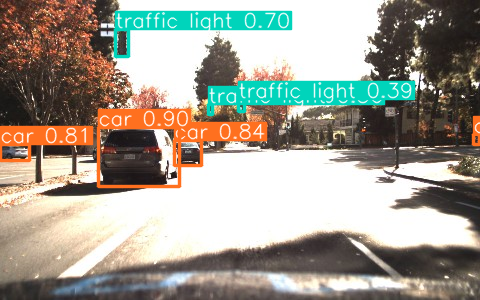

In [ ]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))